# high level feature #test
---

### 1.highLevelFeature.py

In [89]:
import torch as t
from tqdm import tqdm_notebook
import torch.nn as nn
import sys
sys.path.append("..")
sys.path.append("../..")
from data.dataset import UCMdata
from torch.utils.data import DataLoader


class Net(nn.Module):
    def __init__(self, model):
        super(Net, self).__init__()
        #remove last 2 layers
        self.fature = nn.Sequential(*list(model.children())[:-1])
        self.first_fc = nn.Sequential(*list(model.children())[-1][:1])
        self.second_fc = nn.Sequential(*list(model.children())[-1][1:3])

    def forward(self, x):
        x = self.fature(x)
        x = self.first_fc(x)
        x = x.view(1, -1)
        x = self.second_fc(x)
        return x

def highLevelFeature(path,numpy = True):
    #load model
    image_data = UCMdata(path, example=True)
    image = DataLoader(example_data, 1, shuffle=True, num_workers=1)
    AlexNet = t.load('../../checkpoints/0509_21:33:01.pth')
    model = Net(AlexNet)
    #     print(list(model.children()))
    return model(iter(image).next()[0]).squeeze().numpy()

### 2.test

##### 1) input

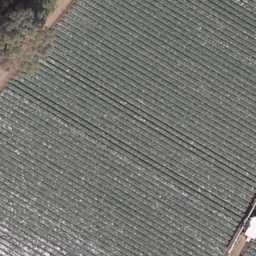

In [82]:
from PIL import Image
path = 'example.tif'
Image.open(path)

##### 2) output

In [93]:
print(highLevelFeature(path).size)

example.tif
4096
